In our case, we're really only meaning to actually trade once a day, not multiple times a day. Besides simply trading, another common practice to use "rebalance" a portfolio in some sort timely manner. Maybe weekly, maybe daily, maybe monthly you want to properly balance, or "diversify" your portfolio. This scheduling functionality lets you do just that! To schedule functions, you call the schedule_function function from within the initialize method.

In [ ]:
def initialize(context):
    context.aapl = sid(24)
    schedule_function(ma_crossover_handling, date_rules.every_day(), time_rules.market_open(hours=1))
    

Here, we're saying that we want to have a scheduled function that runs every_day, 1 hour after market_open. As usual, there are many options here. You can do "x" hours before market close (still using positive values). For example if you wanted to do this 1 hour before market_close, it would be time_rules.market_close(hours=1). You can also schedule in minutes, like: time_rules.market_close(hours=0, minutes=1), which means to run this function 1 minute before the markets close.

In [ ]:
    hist = data.history(context.aapl,'price', 50, '1d')
    
    sma_50 = hist.mean()
    sma_20 = hist[-20:].mean()
    
    open_orders = get_open_orders()
    
    if sma_20 > sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, 1.0)
    elif sma_20 < sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, -1.0)

In [ ]:
def ma_crossover_handling(context,data):
    hist = data.history(context.aapl,'price', 50, '1d')
    
    sma_50 = hist.mean()
    sma_20 = hist[-20:].mean()
    
    open_orders = get_open_orders()
    
    if sma_20 > sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, 1.0)
    elif sma_20 < sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, -1.0)

Note that we're passing both context and data here. Now, run the full back-test, and you should notice that this runs *much* faster than before. This is because we're not actually re-calculating those moving averages every minute, we're just doing it daily now. This is saving us a ton of processing.

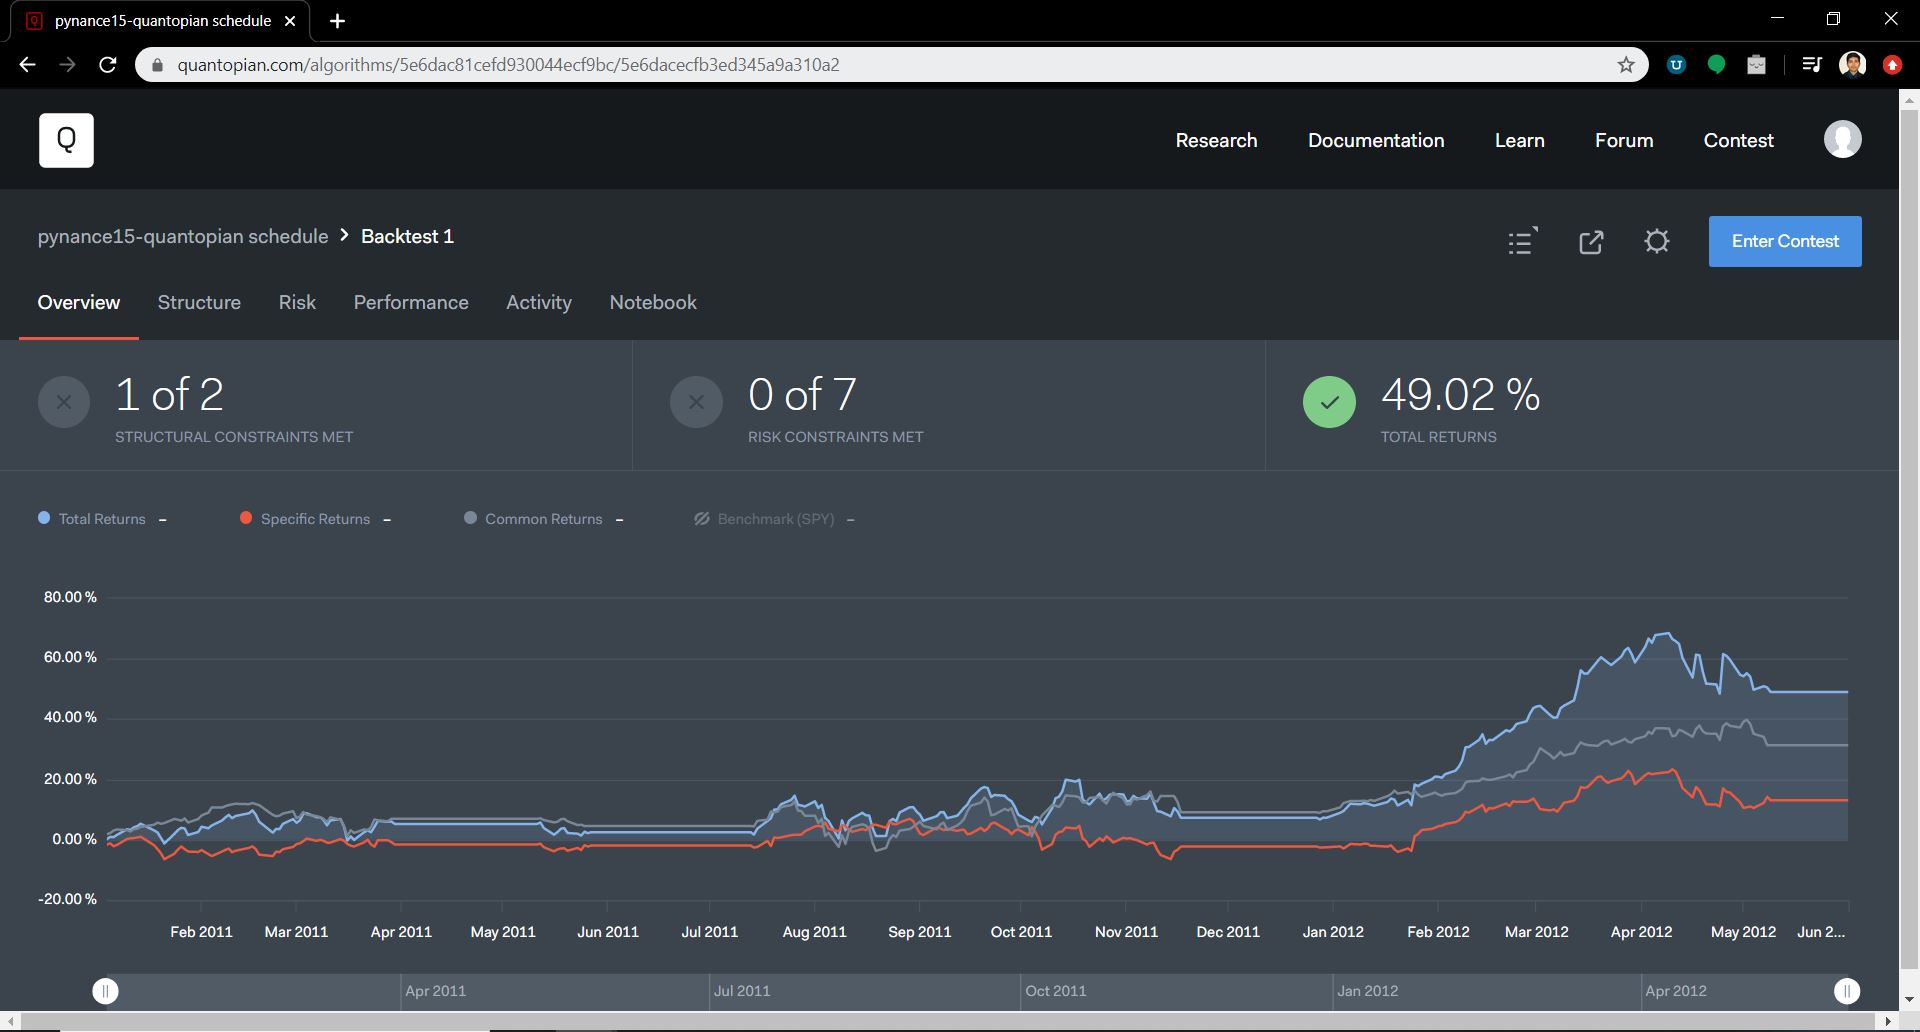

In [1]:
from IPython.display import Image
Image("pynance15 quantopian run.jpg")

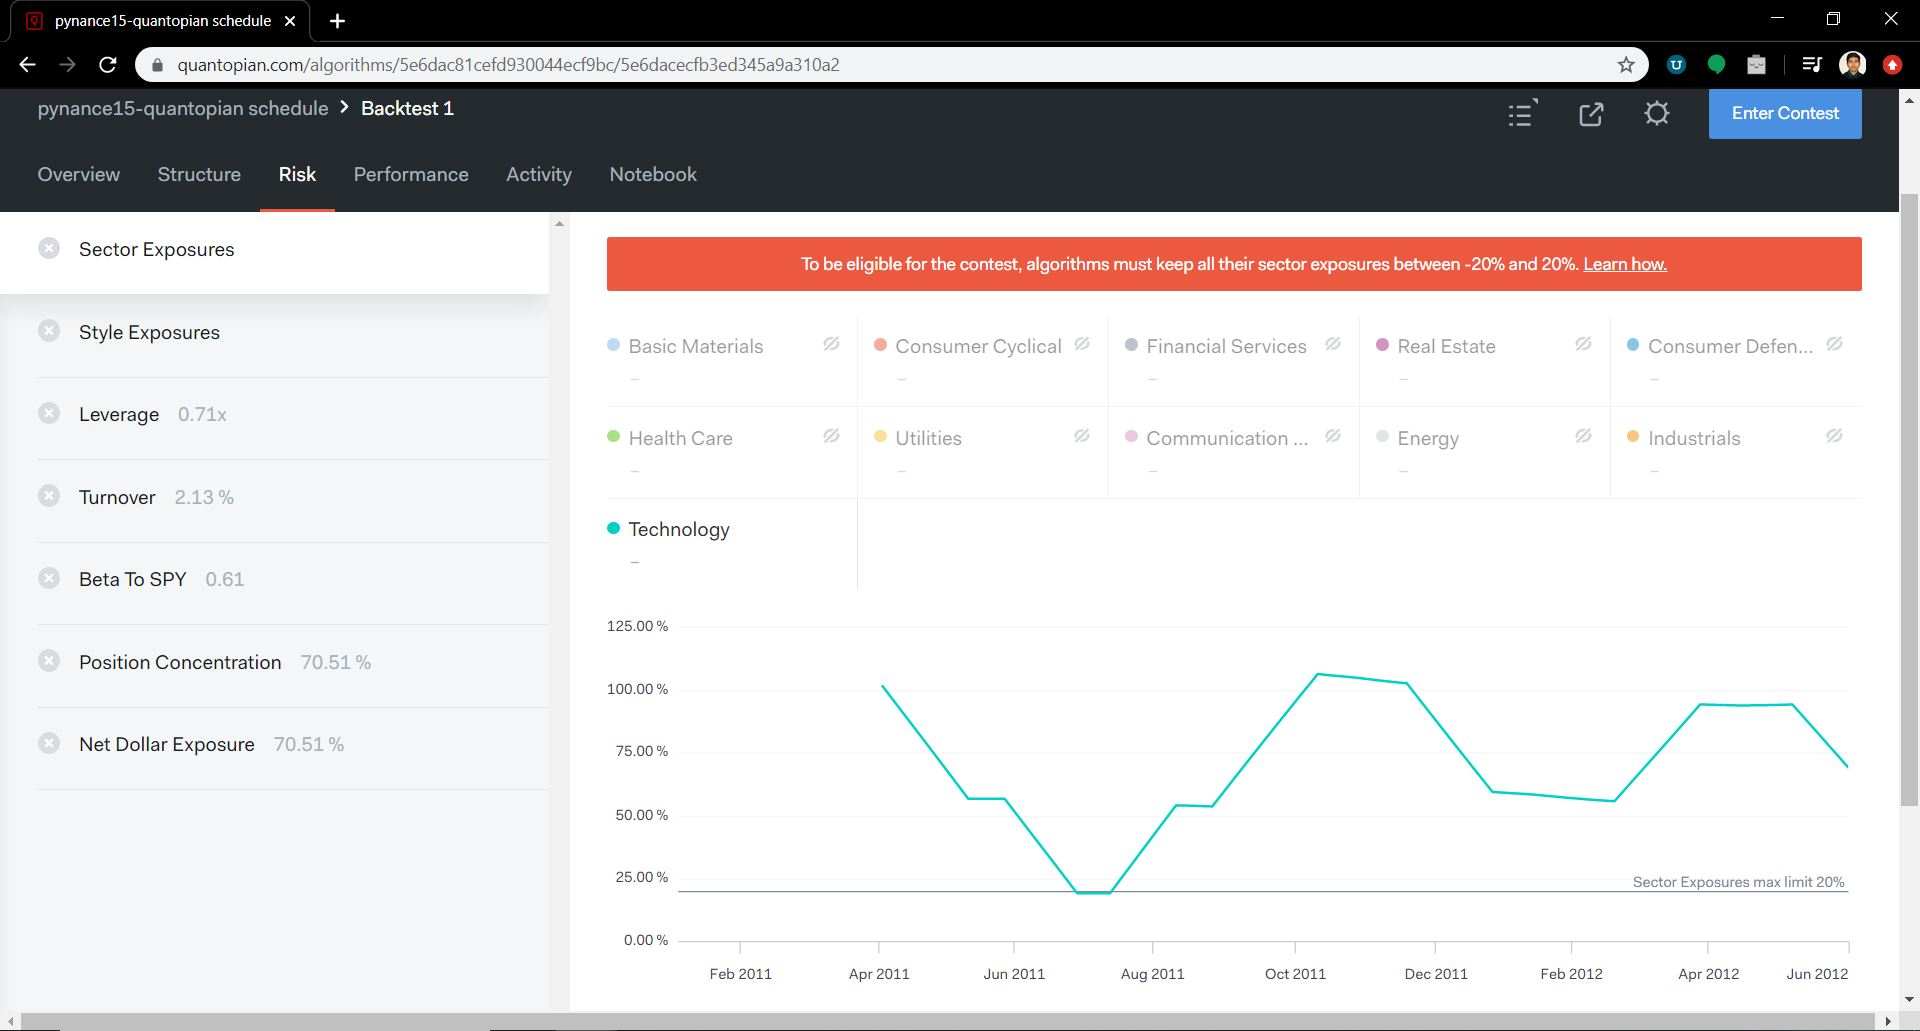

In [2]:
Image("pynance15 quantopian risk.jpg")

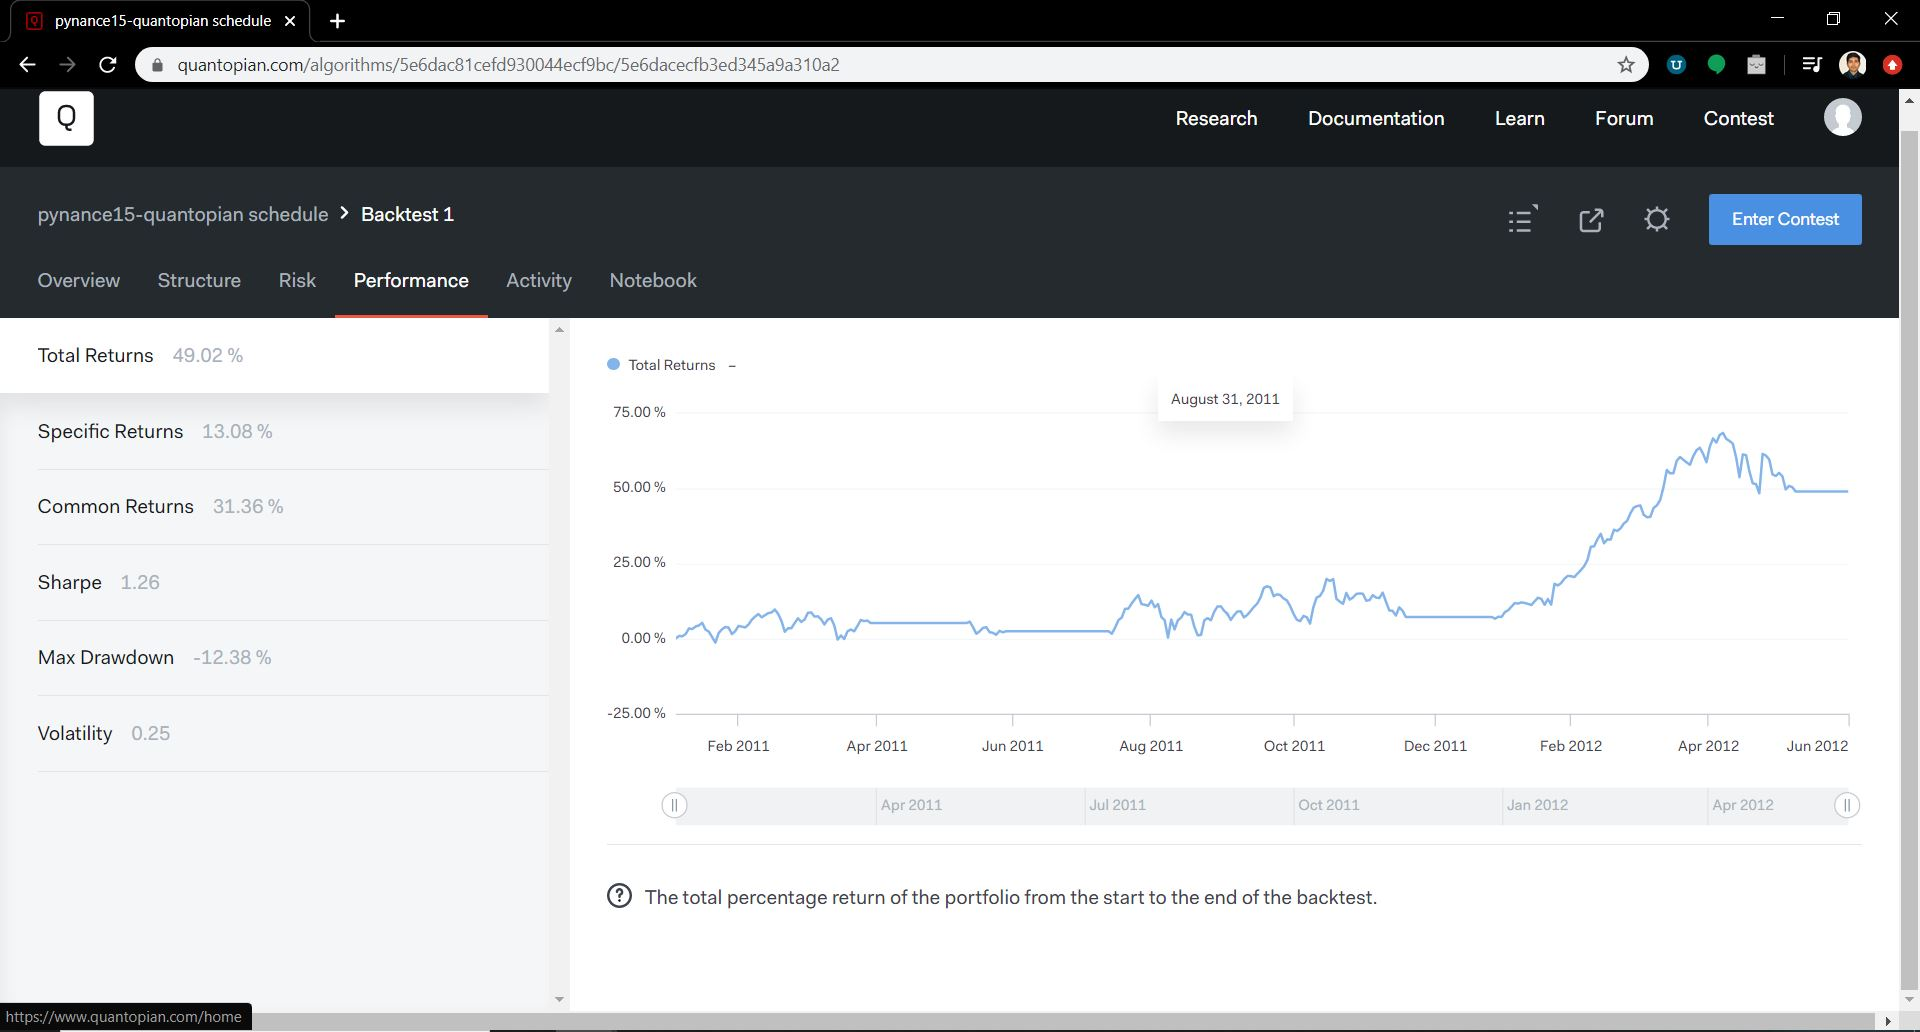

In [3]:
Image("pynance15 quantopian performance.jpg")